In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv.zip to netflix_titles.csv (3).zip


In [14]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv.zip")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
print("Shape:", df.shape)
print("\nInfo:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())


Shape: (8807, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration  

In [17]:
df.columns
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


df['year_added'] = df['date_added'].dt.year
df['country_clean'] = df['country'].fillna('Unknown')
df['director_clean'] = df['director'].fillna('Unknown')
df['rating_clean'] = df['rating'].fillna('Not Rated')
df['listed_in_clean'] = df['listed_in'].fillna('Unknown')


df[['title','type','country','year_added','release_year','rating']].head()


,title,type,country,year_added,release_year,rating
0,Dick Johnson Is Dead,Movie,United States,2021.0,2020,PG-13
1,Blood & Water,TV Show,South Africa,2021.0,2021,TV-MA
2,Ganglands,TV Show,NaN,2021.0,2021,TV-MA
3,Jailbirds New Orleans,TV Show,NaN,2021.0,2021,TV-MA
4,Kota Factory,TV Show,India,2021.0,2021,TV-MA


/tmp/ipython-input-190708081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


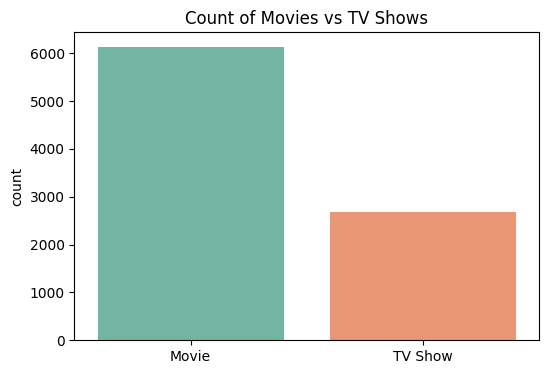

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies vs TV Shows')
plt.xlabel('')
plt.show()
print(df['type'].value_counts())



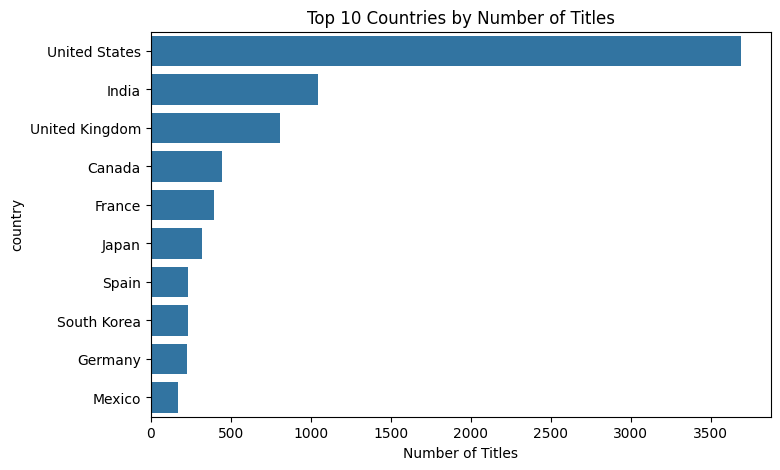

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


In [21]:
country_series = df['country'].dropna().str.split(',').explode().str.strip()
top_countries = country_series.value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.show()
print(top_countries)


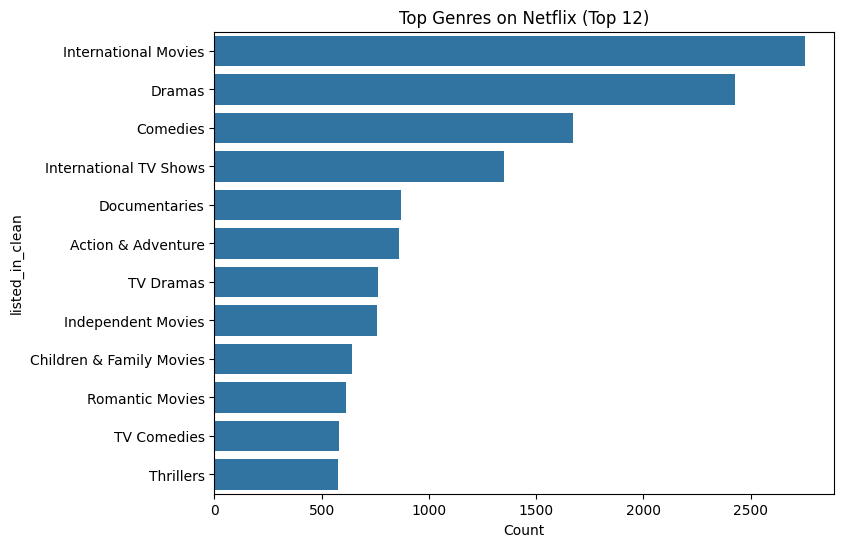

listed_in_clean
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Name: count, dtype: int64


In [22]:
genre_series = df['listed_in_clean'].str.split(',').explode().str.strip()
top_genres = genre_series.value_counts().head(12)

plt.figure(figsize=(8,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top Genres on Netflix (Top 12)')
plt.xlabel('Count')
plt.show()
print(top_genres)


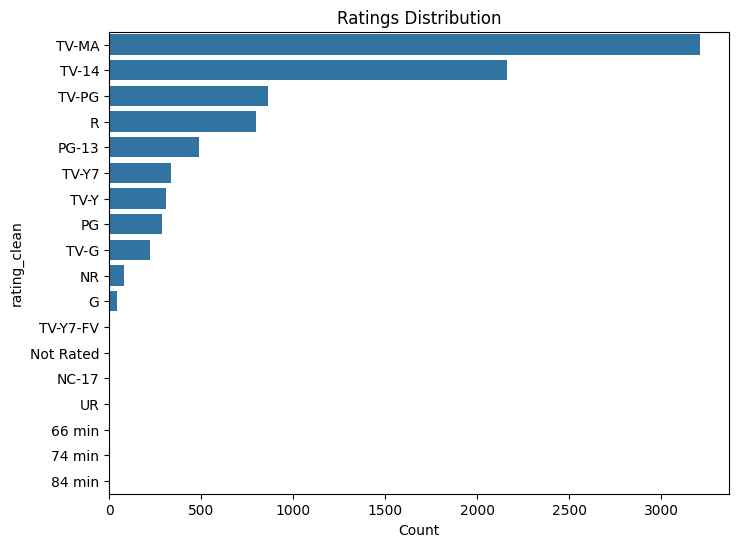

In [23]:
plt.figure(figsize=(8,6))
order = df['rating_clean'].value_counts().index
sns.countplot(y=df['rating_clean'], order=order)
plt.title('Ratings Distribution')
plt.xlabel('Count')
plt.show()


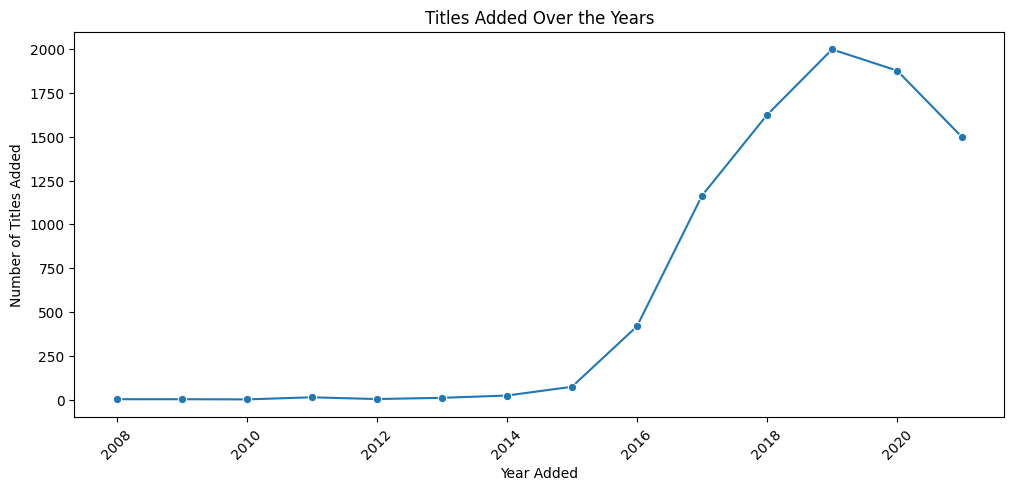

In [24]:
content_by_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12,5))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o')
plt.title('Titles Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1766981896.py:2: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)


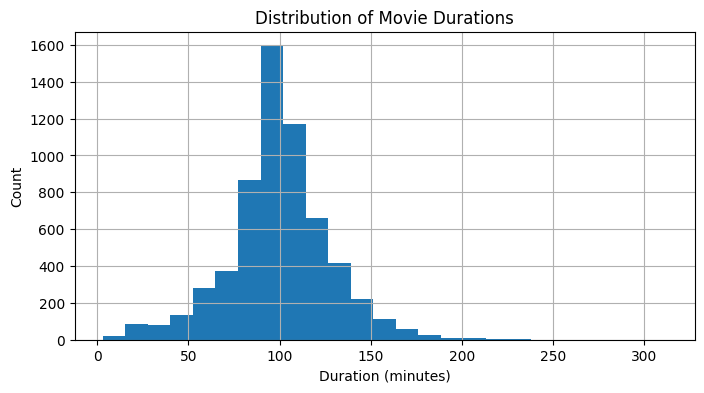

Duration summary (minutes):
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64


In [25]:
movies = df[df['type']=='Movie'].copy()
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
plt.figure(figsize=(8,4))
movies['duration_min'].dropna().hist(bins=25)
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Movie Durations')
plt.show()

print("Duration summary (minutes):")
print(movies['duration_min'].describe())


In [26]:
top_directors = df['director_clean'].str.split(',').explode().str.strip().value_counts().head(10)
top_directors


,count
director_clean,
Unknown,2634
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Martin Scorsese,12


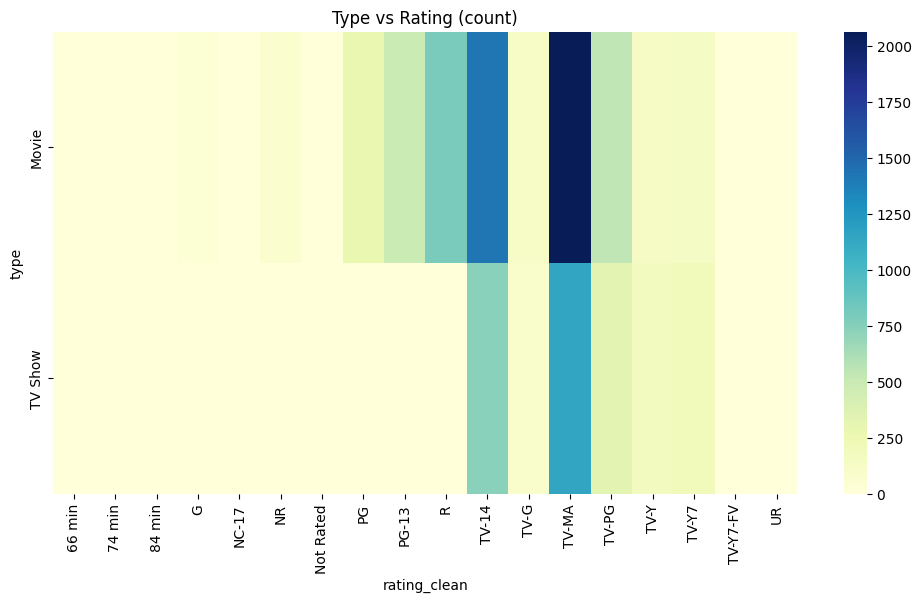

In [28]:
ct = pd.crosstab(df['type'], df['rating_clean'])
ct.head()
plt.figure(figsize=(12,6))
sns.heatmap(ct, annot=False, cmap='YlGnBu')
plt.title('Type vs Rating (count)')
plt.show()



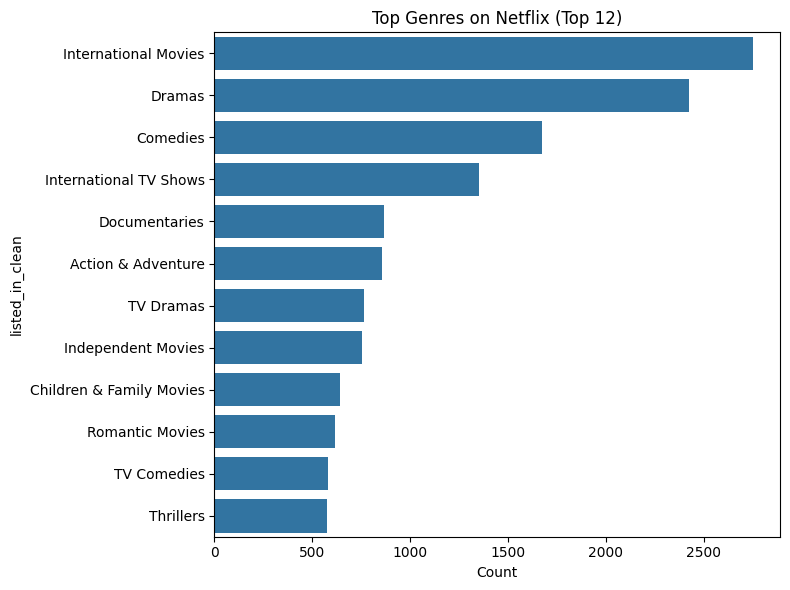

In [29]:

plt.figure(figsize=(8,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top Genres on Netflix (Top 12)')
plt.xlabel('Count')
plt.tight_layout()
plt.savefig("top_genres.png")
plt.show()



In [31]:

cleaned = df.dropna(subset=['type'])
cleaned.to_csv("netflix_titles_cleaned.csv", index=False)


# EDA on Netflix Movies & TV Shows
**Author:** Sneha Samanta  
**Objective:**  
To analyze the Netflix dataset to uncover insights such as content type distribution, popular genres, countries producing most content, and yearly trends.

---

## 📊 Dataset Overview
- **Source:** Netflix Titles Dataset (Kaggle)  
- **Rows:** ~8800  
- **Columns:** 12  
- Columns include: *show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description.*

---

## 🧹 Data Cleaning Steps
1. Converted `date_added` to datetime format.  
2. Filled missing values in `country`, `director`, and `rating` with placeholders like “Unknown” or “Not Rated.”  
3. Created helper columns like `year_added` and exploded multi-valued columns for better analysis.  

---

## 📈 Key Findings

### 1️⃣ Movies vs TV Shows  
- Movies are more than TV Shows on Netflix.  
- Visualization shows Movies have higher count (approx 70% vs 30%).  

### 2️⃣ Top Countries  
- The **United States**, **India**, and **United Kingdom** produce the most Netflix content.  

### 3️⃣ Top Genres  
- The most common genres are **International Movies**, **Dramas**, and **Comedies**.  

### 4️⃣ Ratings Distribution  
- Ratings like **TV-MA** and **TV-14** are most frequent, indicating mature or teen-oriented content dominates Netflix.  

### 5️⃣ Titles Added Over the Years  
- Huge increase in content after **2015**, showing Netflix’s global expansion period.  

### 6️⃣ Movie Duration  
- Average movie duration ≈ **100 minutes**, most movies fall between 90–120 minutes.

---

## ✅ Conclusion
- Netflix mainly focuses on Movies more than TV Shows.  
- U.S. and India dominate the platform’s content.  
- Dramas and Comedies are the most frequent genres.  
- Rapid content growth was observed after 2015.  

---

## ⚙️ Limitations
- Missing data for director/country fields.  
- Dataset may not include latest titles after 2021.  

---

 Future Work
- Predict which genres will grow next.  
- Build recommendation models using cast or genre similarity.  
- Analyze user sentiment from descriptions.

---

